<a href="https://colab.research.google.com/github/oseghr/MachineLearning/blob/main/machineModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [11]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

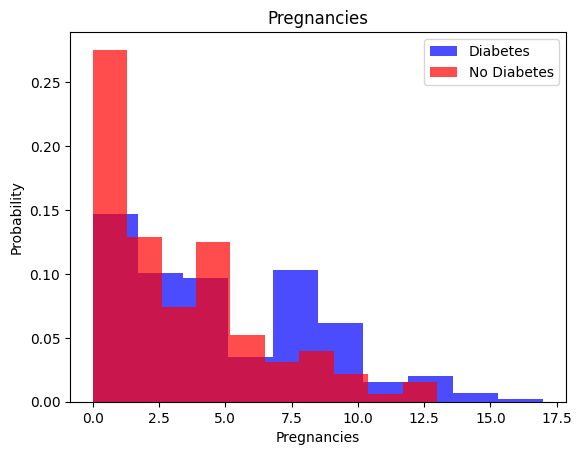

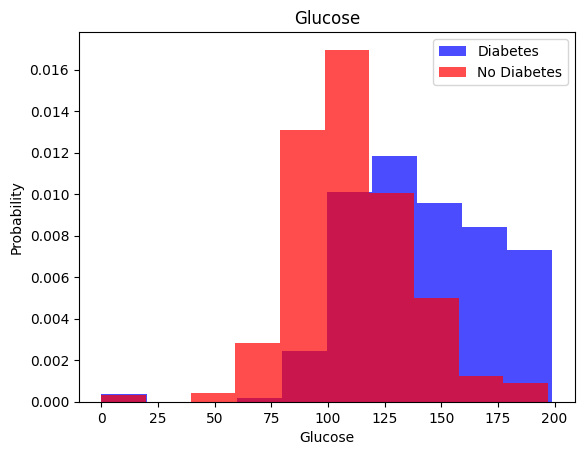

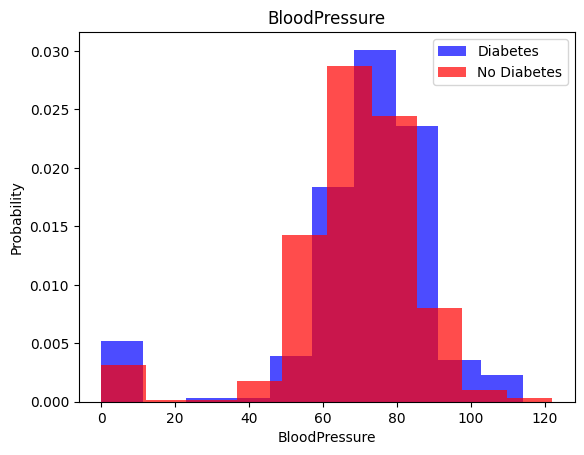

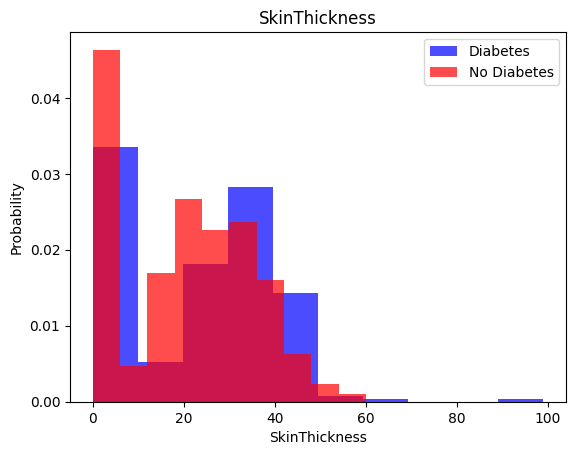

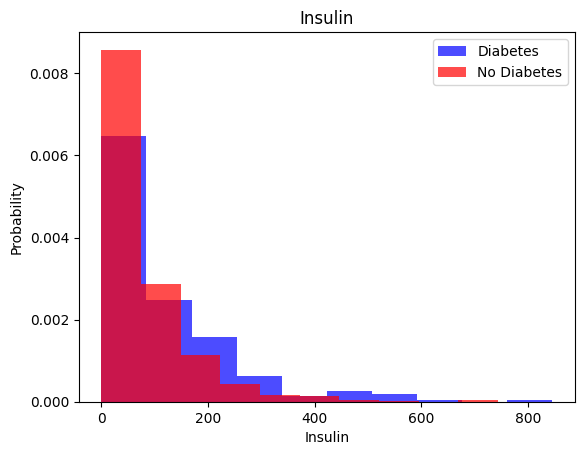

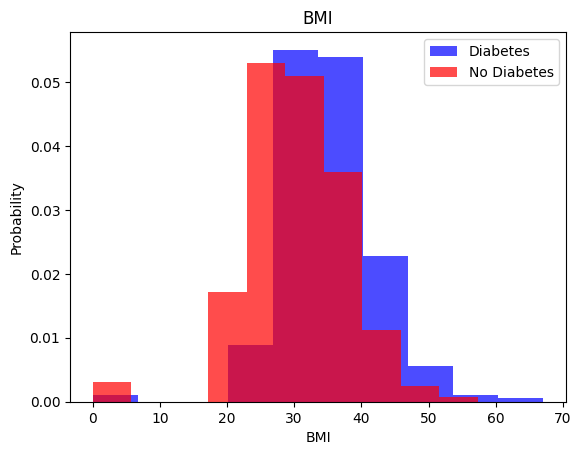

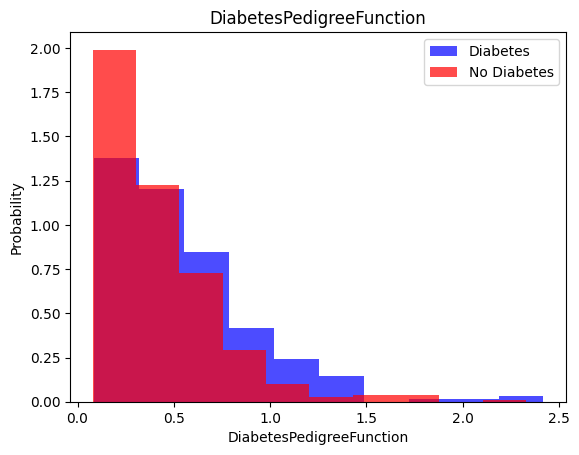

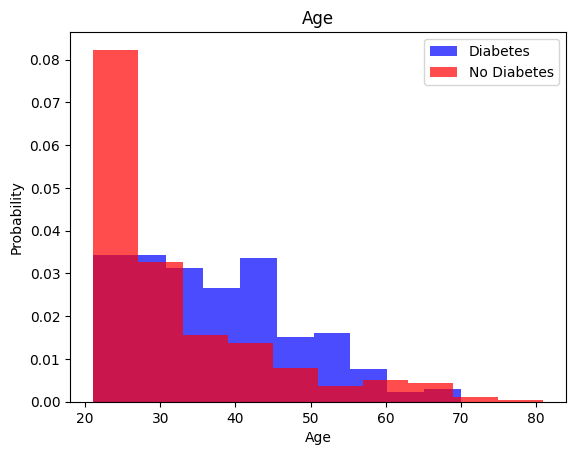

In [12]:
for i in range(len(data.columns[:-1])):
  label = data.columns[i]
  plt.hist(data[data["Outcome"]==1][label], color="blue", label="Diabetes", alpha=0.7, density=True)
  plt.hist(data[data["Outcome"]==0][label], color="red", label="No Diabetes", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [7]:
x = data[data.columns[:-1]].values
y = data[data.columns[-1]].values

In [8]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [13]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [16]:
model.evaluate(x_train, y_train)

15/15 [==============================] - 1s 6ms/step - loss: 7.3548 - accuracy: 0.6413


[7.35482120513916, 0.6413043737411499]

In [17]:
model.evaluate(x_valid, y_valid)

5/5 [==============================] - 0s 7ms/step - loss: 6.8260 - accuracy: 0.6494


[6.825953006744385, 0.649350643157959]

In [18]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
29/29 [==============================] - 2s 6ms/step - loss: 3.4178 - accuracy: 0.6413 - val_loss: 1.3090 - val_accuracy: 0.6818
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: 1.1899 - accuracy: 0.6109 - val_loss: 0.8790 - val_accuracy: 0.6364
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: 0.9653 - accuracy: 0.6065 - val_loss: 0.7732 - val_accuracy: 0.6558
Epoch 4/20
29/29 [==============================] - 0s 4ms/step - loss: 0.8111 - accuracy: 0.6174 - val_loss: 0.7699 - val_accuracy: 0.6364
Epoch 5/20
29/29 [==============================] - 0s 4ms/step - loss: 0.7854 - accuracy: 0.6500 - val_loss: 0.6842 - val_accuracy: 0.6494
Epoch 6/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.6565 - val_loss: 0.6700 - val_accuracy: 0.6883
Epoch 7/20
29/29 [==============================] - 0s 10ms/step - loss: 0.6712 - accuracy: 0.6565 - val_loss: 0.6598 - val_accuracy: 0.6494
Epoch 8/20
29/29 [=